# 1. Apply Averaging filter of image eye2_1 with 
## Uniform weights: [1 1 1; 1 1 1; 1 1 1]* (1/9) and
## nonuniform weights: [1 2 1; 2 4 2; 1 2 1]* (1/16)  (20 points)

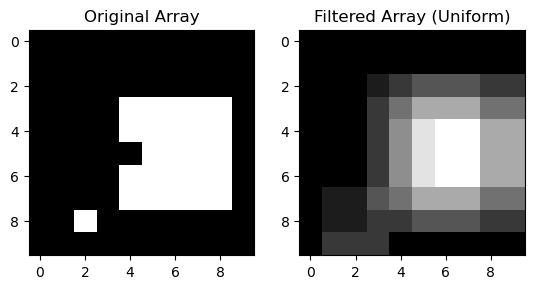

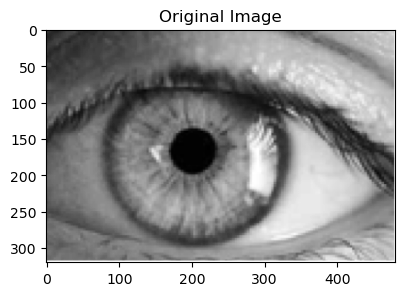

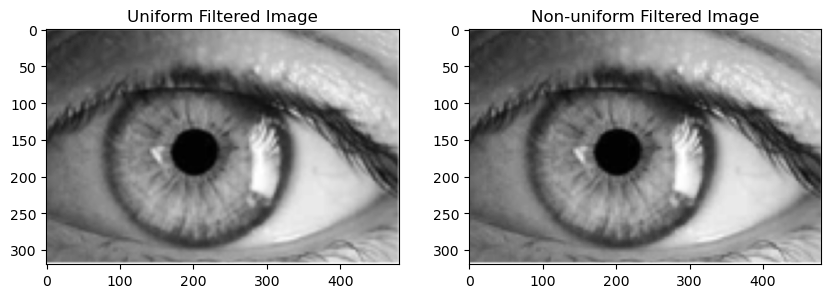

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 10x10 array of zeros
a = np.zeros((10, 10))

# Specific values in the array based on conditions
for i in range(10):
    for j in range(10):
        if 2 < i < 8 and 3 < j < 9:
            a[i, j] = 90

a[8, 2] = 90  
a[5, 4] = 0  

# Averaging filter (uniform)
mask = np.ones((3, 3)) * (1 / 9)

# Applying the filter using OpenCV
averageImg = cv2.filter2D(a, -1, mask)

# Plotting the original and filtered images
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.title('Original Array')
plt.subplot(1, 2, 2)
plt.imshow(averageImg, cmap='gray')
plt.title('Filtered Array (Uniform)')
plt.show()

# Image and convert it to grayscale
img1 = cv2.imread('eye2_1.png', cv2.IMREAD_GRAYSCALE)
figsize=(5, 5)
# Resizing the image to 320x480
img1_resized = cv2.resize(img1, (480, 320))

# Original image
plt.figure(figsize=(4.5, 5))
plt.imshow(img1_resized, cmap='gray')
plt.title('Original Image')
plt.show()

# Uniform averaging filter
mask1 = np.ones((3, 3)) * (1 / 9)
averageImg1 = cv2.filter2D(img1_resized, -1, mask1)

# Non-uniform averaging filter
mask2 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) * (1 / 16)
averageImg2 = cv2.filter2D(img1_resized, -1, mask2)

# Displaying filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(averageImg1, cmap='gray')
plt.title('Uniform Filtered Image')
plt.subplot(1, 2, 2)
plt.imshow(averageImg2, cmap='gray')
plt.title('Non-uniform Filtered Image')
plt.show()


# 2. Show the 3D Gaussian function (10 points)

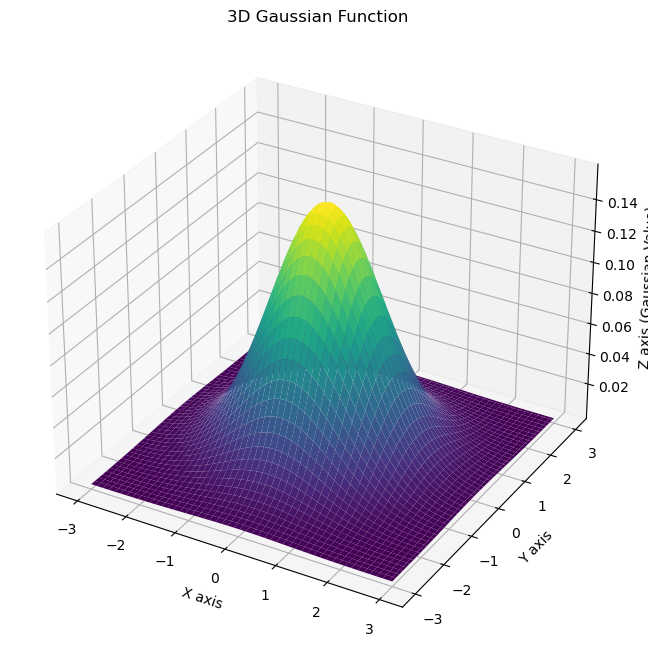

In [17]:
# 3D Plot of Gaussian Function
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title('3D Gaussian Function')
# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis (Gaussian Value)')
ax.set_title('3D Gaussian Function')

plt.show()

# 3. Apply Gaussian image filtering of image eye2_1 (10 points)

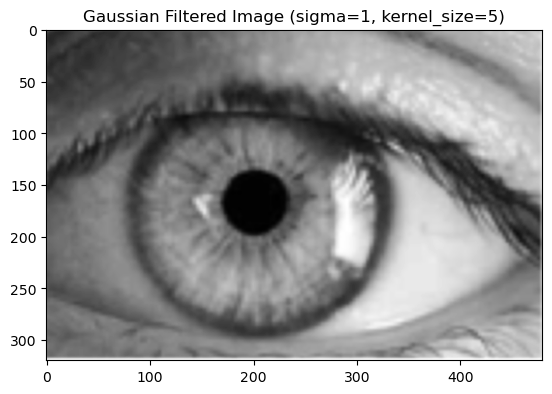

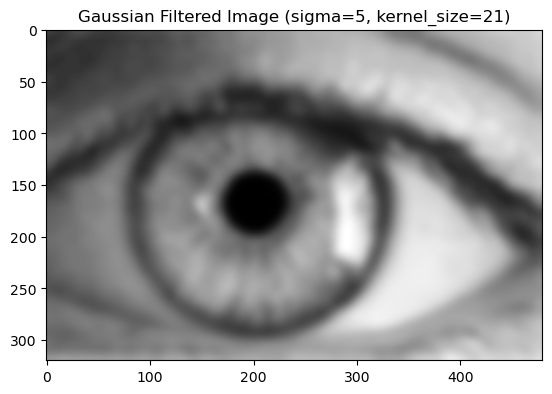

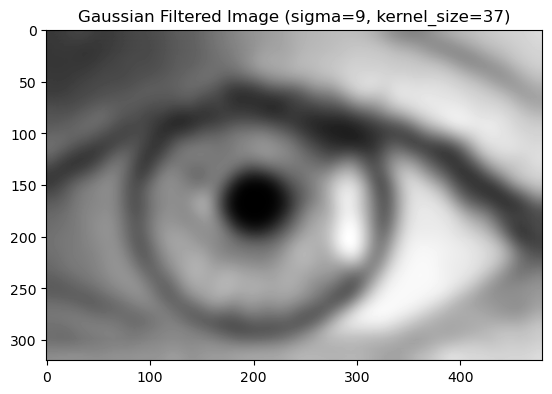

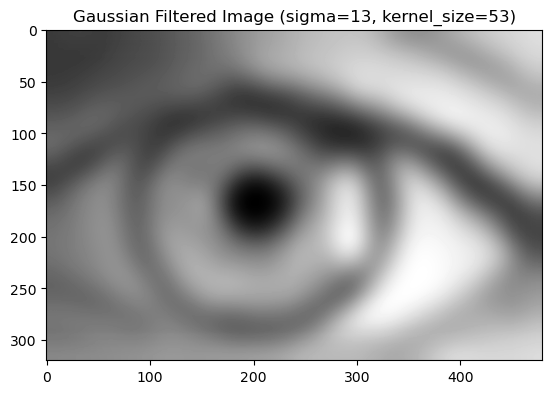

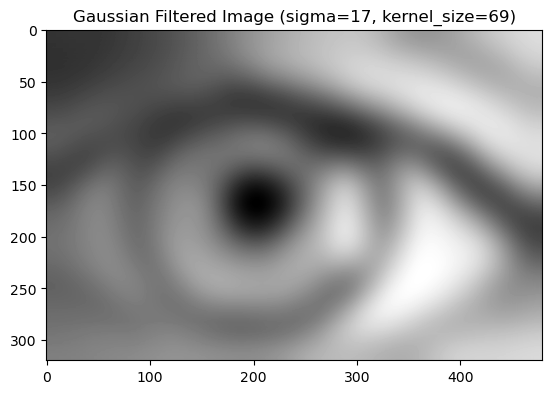

In [22]:
# Gaussian Image Filtering
img1 = cv2.imread('eye2_1.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (480, 320))

# Gaussian Image Filtering
for s in range(1, 21, 4): 

    current_kernel_size = max(3, 2 * int(2 * s + 0.5) + 1)
    gaussian_filtered_img = cv2.GaussianBlur(img1, (current_kernel_size, current_kernel_size), s)
    
    plt.figure()
    plt.imshow(gaussian_filtered_img, cmap='gray')
    plt.title(f'Gaussian Filtered Image (sigma={s}, kernel_size={current_kernel_size})')
    plt.show()

# 4. Apply Unsharp mask of image eye2_1 (10 points)

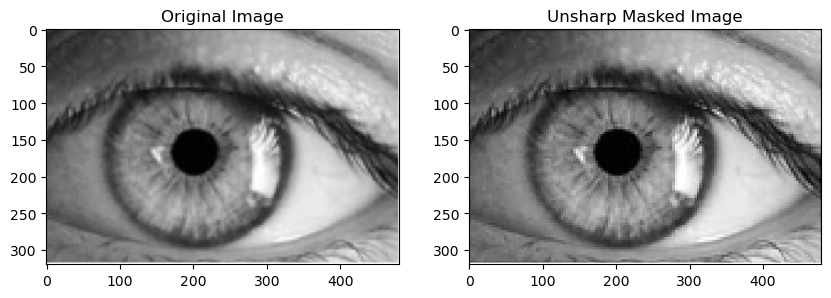

In [27]:
# Resizing the image to 320x480 
img_resized = cv2.resize(img, (480, 320))

# Applying Gaussian blur to the image 
blurred_img = cv2.GaussianBlur(img_resized, (5, 5), 0)

# Applying Unsharp Masking
amount = 1.5
unsharp_img = cv2.addWeighted(img_resized, 1 + amount, blurred_img, -amount, 0)

# Displaying the original and unsharp masked images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_resized, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(unsharp_img, cmap='gray')
plt.title('Unsharp Masked Image')

plt.show()


# 5. Remove noise of noise_bridge image using
## Gaussain filter (15 points)
## Uniform filter (15 points)
## Median filter (20 points)

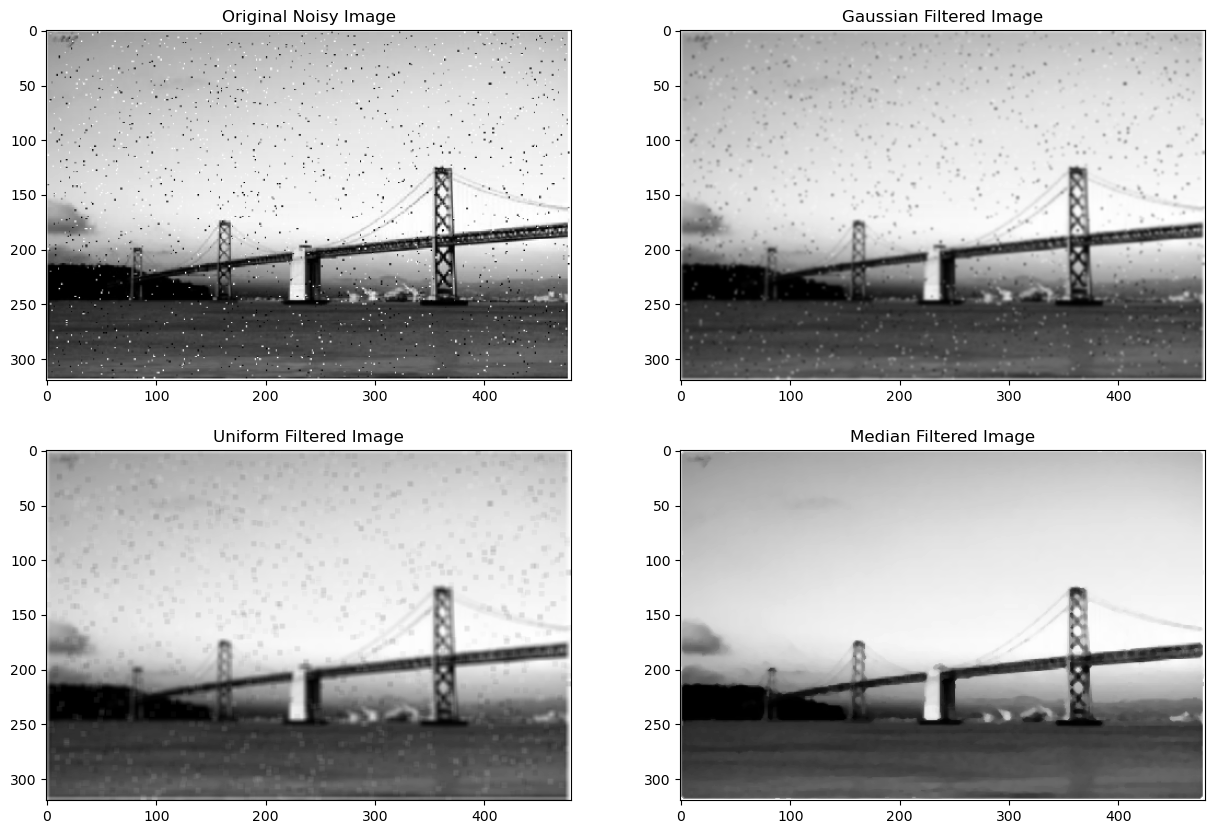

In [30]:
# Noisy image
img = cv2.imread('noise_bridge.png', cv2.IMREAD_GRAYSCALE)

# Resizing the image (optional, based on size)
img_resized = cv2.resize(img, (480, 320))

# 1. Applying Gaussian filter
# Gaussian filter with kernel size (5, 5) and standard deviation 0
gaussian_filtered_img = cv2.GaussianBlur(img_resized, (5, 5), 0)

# 2. Applying Uniform (averaging) filter
# Uniform averaging filter with kernel size (5, 5)
uniform_filtered_img = cv2.blur(img_resized, (5, 5))

# 3. Applying Median filter
# Median filter with kernel size 5
median_filtered_img = cv2.medianBlur(img_resized, 5)

# Displaying the original and filtered images
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img_resized, cmap='gray')
plt.title('Original Noisy Image')

# Gaussian Filtered Image
plt.subplot(2, 2, 2)
plt.imshow(gaussian_filtered_img, cmap='gray')
plt.title('Gaussian Filtered Image')

# Uniform Filtered Image
plt.subplot(2, 2, 3)
plt.imshow(uniform_filtered_img, cmap='gray')
plt.title('Uniform Filtered Image')

# Median Filtered Image
plt.subplot(2, 2, 4)
plt.imshow(median_filtered_img, cmap='gray')
plt.title('Median Filtered Image')

plt.show()

